In [148]:
from openml.datasets import list_datasets, get_datasets
import pandas as pd

dataset = get_datasets([41982]) #MNIST
#dataset = get_datasets([137])
dataset = dataset[0]

In [149]:
y = dataset.default_target_attribute
x,tg,z,w = dataset.get_data(target=y)
#x = x.replace(to_replace={'o':2, 'x': 1, 'b':0})
#x = x.astype('Int8')
#tg = tg.replace(to_replace={'positive':True, 'negative':False})
#tg = tg.astype(bool)

In [151]:
tg.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=True)

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, tg)

In [160]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300), max_iter=100, solver='sgd')#,early_stopping=False, warm_start=True)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300), max_iter=100,
              solver='sgd')

In [161]:

mlp.score(x_test, y_test)

0.9302285714285714

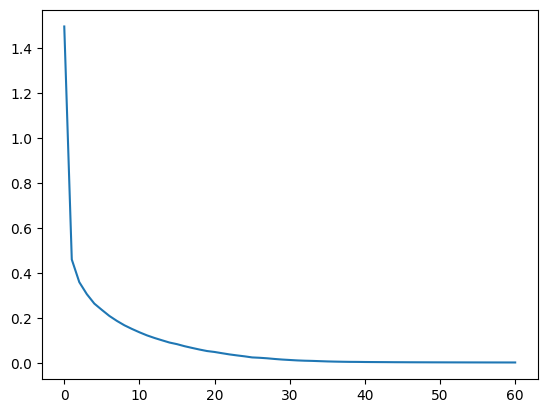

In [162]:
from matplotlib.pyplot import plot
plot(mlp.loss_curve_)

In [156]:
for layer in mlp.coefs_:
    print(layer.shape)

(784, 100)
(100, 100)
(100, 100)
(100, 10)


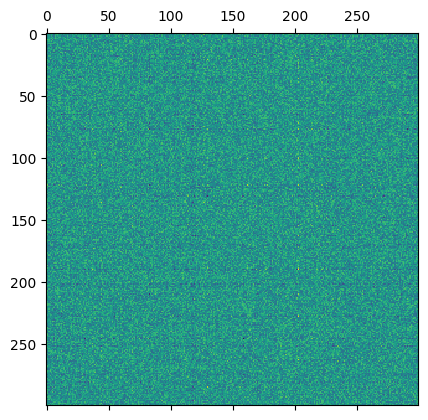

In [163]:
from matplotlib.pyplot import matshow
matshow(mlp.coefs_[2])

In [168]:
import numpy as np

distribution = []

for layer in mlp.coefs_[1:-1]:
    weights = np.zeros((1,300))
    for x in layer:
        xsq = np.multiply(x,x)
        weights += xsq
    np.sqrt(weights)
    distribution += list(weights.reshape(300))


(array([ 10.,  23.,  34.,  51.,  84., 102., 110.,  87.,  88.,  60.,  41.,
         37.,  32.,  19.,  22.,  12.,  13.,   8.,   6.,   1.,   6.,   6.,
          8.,   7.,   3.,   1.,   4.,   0.,   1.,   1.,   1.,   3.,   3.,
          0.,   3.,   1.,   1.,   1.,   1.,   3.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([0.90059986, 0.92428751, 0.94797516, 0.97166281, 0.99535046,
        1.01903811, 1.04272576, 1.06641341, 1.09010106, 1.11378871,
        1.13747636, 1.16116401, 1.18485166, 1.20853932, 1.23222697,
        1.25591462, 1.27960227, 1.30328992, 1.32697757, 1.35066522,
        1.37435287, 1.39804052, 1.42172817, 1.44541582, 1.46910347,
        1.49279112, 1.51647877, 1.54016642, 1.56385407, 1.58754172,
        1.61122937, 1.63491702, 1.65860467, 1.68229232, 1.70597997,
        1.72966762, 1.75335527, 1.77704292, 1.

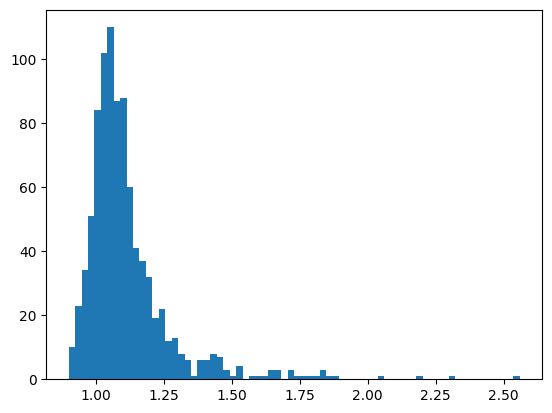

In [169]:
from matplotlib.pyplot import hist
hist(distribution, bins=70)